# Step 1: Import Necessary Libraries

In [21]:
# Import required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Step 2: Set File Paths and Load Data

In [22]:
# Set file path
path = r'C:\Users\Asus\Music\CareerFoundry_Python_Session'

# Load data
df = pd.read_pickle(os.path.join(path, 'ords_prods_final.pkl'))
orders_df = pd.read_csv(os.path.join(path, 'cleaned_orders_data.csv'))

# Display first few rows
print("ords_prods_final.pkl Data:")
display(df.head())

print("cleaned_orders_data.csv Data:")
display(orders_df.head())

# Check the shape of both datasets
print("ords_prods_final shape:", df.shape)
print("cleaned_orders_data shape:", orders_df.shape)

ords_prods_final.pkl Data:


,order_id,user_id_x,eval_set_x,order_number_x,order_dow_x,order_hour_of_day_x,days_since_prior_order_x,product_id,product_name_x,aisle_id_x,...,price_label,busiest_days,busiest_period_of_day,busiest_period_label,order_count,loyalty_flag,spending_flag,spending_category,order_frequency_flag,order_frequency_category
0,23391,7,prior,17,0,10,28.0,23391.0,Organic Fennel Bulb,100.0,...,Medium,Busiest days,Morning,Average orders,1,New Customer,8.116262,Low spender,28.0,Non-frequent customer
1,19256,13,prior,4,1,12,9.0,19256.0,Belgian Chocolate Chocolate Ice Cream,37.0,...,High,Busiest days,Afternoon,Most orders,1,New Customer,19.063572,High spender,9.0,Frequent customer
2,8382,23,prior,2,0,10,9.0,8382.0,Organic Tomato Bisque,1.0,...,High,Busiest days,Morning,Average orders,1,New Customer,14.907885,High spender,9.0,Frequent customer
3,7099,27,prior,63,3,10,1.0,7099.0,Sleepytime Vanilla Caffeine Free Herbal Tea Bags,94.0,...,High,Slowest days,Morning,Average orders,1,New Customer,12.374511,High spender,1.0,Frequent customer
4,14400,36,prior,10,1,18,1.0,14400.0,"Spray Gel, Citrus Scent",114.0,...,Low,Busiest days,Evening,Average orders,1,New Customer,3.964354,Low spender,1.0,Frequent customer


cleaned_orders_data.csv Data:


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,aisle_id,department_id,department
0,2539329,1,prior,1,2,8,NaN,NaN,NaN,NaN,NaN,NaN
1,2398795,1,prior,2,3,7,15.0,NaN,NaN,NaN,NaN,NaN
2,473747,1,prior,3,3,12,21.0,NaN,NaN,NaN,NaN,NaN
3,2254736,1,prior,4,4,7,29.0,NaN,NaN,NaN,NaN,NaN
4,431534,1,prior,5,4,15,28.0,NaN,NaN,NaN,NaN,NaN


ords_prods_final shape: (49688, 32)
cleaned_orders_data shape: (3421083, 12)


# Step 3: Create Visualizations

C:\Users\Asus\anaconda3\New folder\envs\20th_century\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.



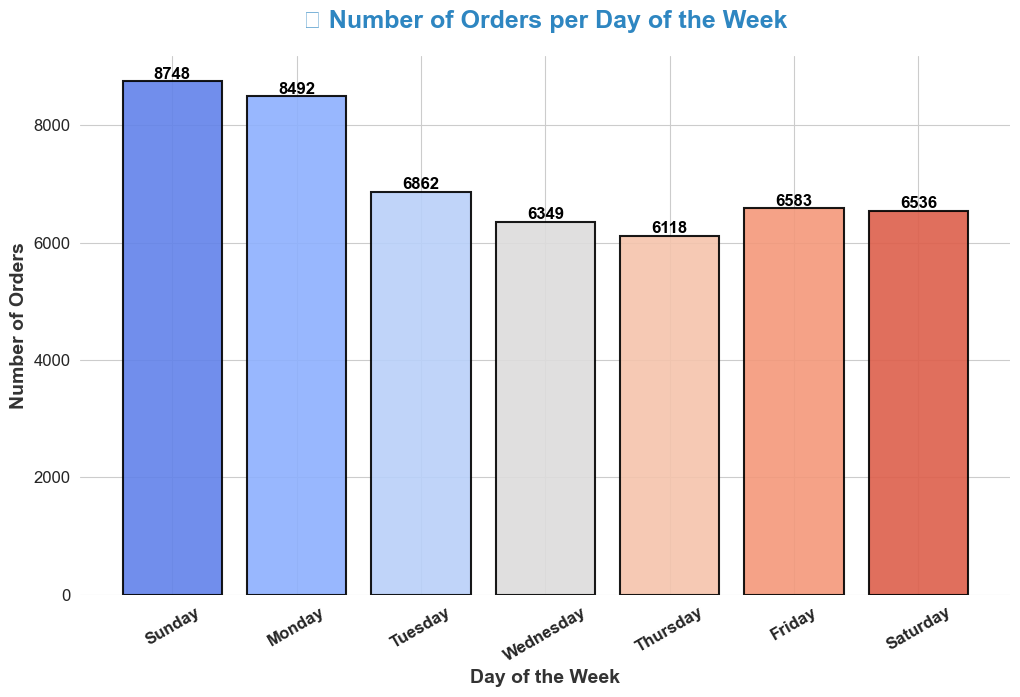

In [25]:

# Set Seaborn style for a clean, modern look
sns.set_style("whitegrid")

# Define day labels (assuming 0 = Sunday, 6 = Saturday)
day_labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Count and sort order frequency by day of the week
order_counts = df['order_dow_x'].value_counts().sort_index()

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Generate colors using a gradient effect
colors = sns.color_palette("coolwarm", len(order_counts))

# Create bars with a modern look
bars = plt.bar(order_counts.index, order_counts.values, color=colors, edgecolor="black", linewidth=1.5, alpha=0.9)

# Add text annotations on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, f"{int(yval)}", ha="center", fontsize=12, fontweight='bold', color="black")

# Customize labels
plt.xticks(ticks=range(7), labels=day_labels, rotation=30, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)
plt.xlabel("Day of the Week", fontsize=14, fontweight='bold', color="#333")
plt.ylabel("Number of Orders", fontsize=14, fontweight='bold', color="#333")
plt.title("📊 Number of Orders per Day of the Week", fontsize=18, fontweight='bold', color="#2E86C1", pad=20)

# Remove unnecessary borders for a cleaner look
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

# Task 03: Create a Histogram (Orders by Hour of Day)

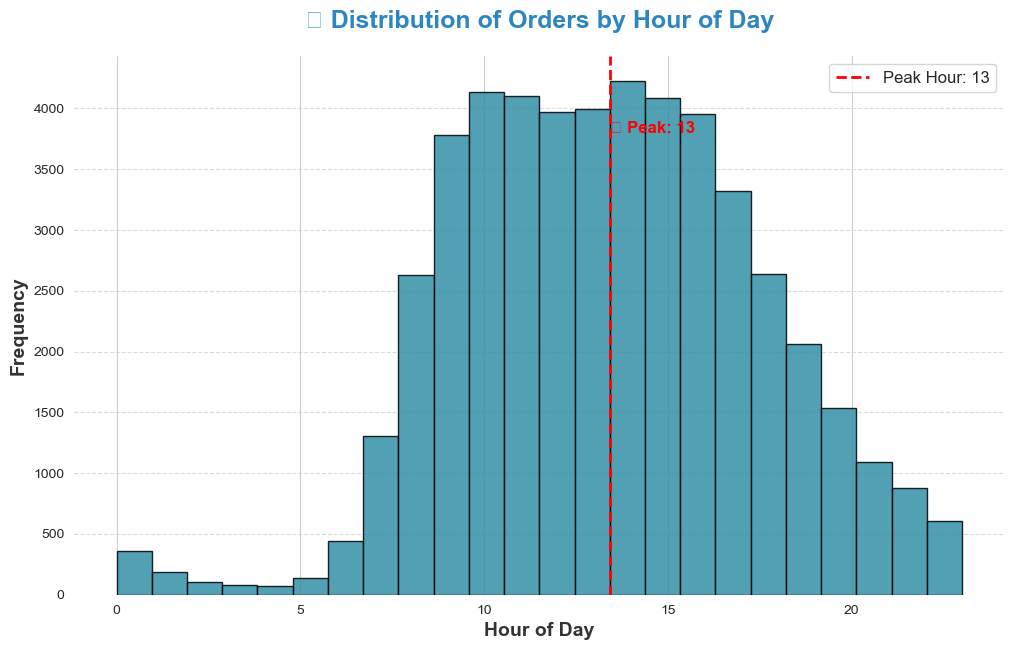

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Use a single color from the palette
color = sns.color_palette("mako")[3]  # Pick one color

# Plot histogram
n, bins, patches = plt.hist(df['order_hour_of_day_x'], bins=24, edgecolor="black", alpha=0.85, color=color)

# Customize labels
plt.xlabel("Hour of Day", fontsize=14, fontweight="bold", color="#333")
plt.ylabel("Frequency", fontsize=14, fontweight="bold", color="#333")
plt.title("⏳ Distribution of Orders by Hour of Day", fontsize=18, fontweight="bold", color="#2E86C1", pad=20)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the peak hour (hour with max orders)
peak_hour = bins[n.argmax()]
plt.axvline(peak_hour, color="red", linestyle="dashed", linewidth=2, label=f"Peak Hour: {int(peak_hour)}")

# Add annotation for peak hour
plt.text(peak_hour, max(n)*0.9, f"🔴 Peak: {int(peak_hour)}", fontsize=12, fontweight="bold", color="red")

# Add legend
plt.legend(fontsize=12)

# Remove unnecessary borders
sns.despine(left=True, bottom=True)

# Show plot
plt.show()


# Task 04: Create a Scatter Plot (Order Hour vs Order Number)

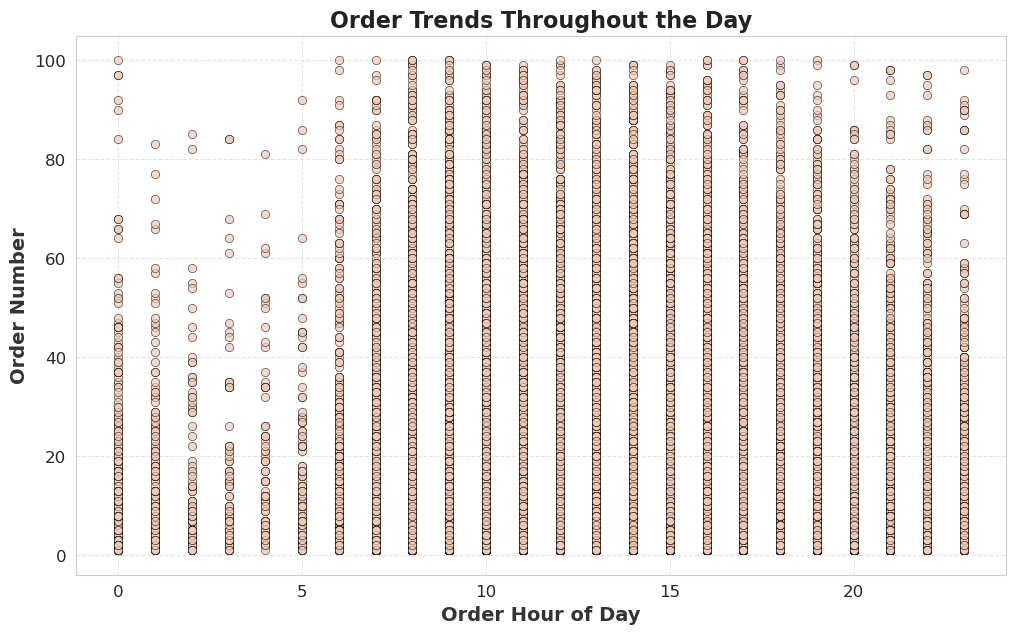

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Set the style
sns.set_style("whitegrid")

# Set font to avoid glyph missing warnings
plt.rcParams["font.family"] = "DejaVu Sans"  # Supports more glyphs

# Define the figure size
plt.figure(figsize=(12, 7))

# Create an enhanced scatter plot
scatter = sns.scatterplot(
    x=df["order_hour_of_day_x"], 
    y=df["order_number_x"], 
    alpha=0.7, 
    edgecolor="black", 
    color=sns.color_palette("coolwarm", as_cmap=True)(0.6)  # Gradient color
)

# Customize labels and title (emoji removed)
plt.xlabel("Order Hour of Day", fontsize=14, fontweight="bold", color="#333")
plt.ylabel("Order Number", fontsize=14, fontweight="bold", color="#333")
plt.title("Order Trends Throughout the Day", fontsize=16, fontweight="bold", color="#222")  # No emoji

# Add gridlines and style tweaks
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the chart
plt.show()

# Task 05: Create a Line Chart (Average Days Since Prior Order by Hour)

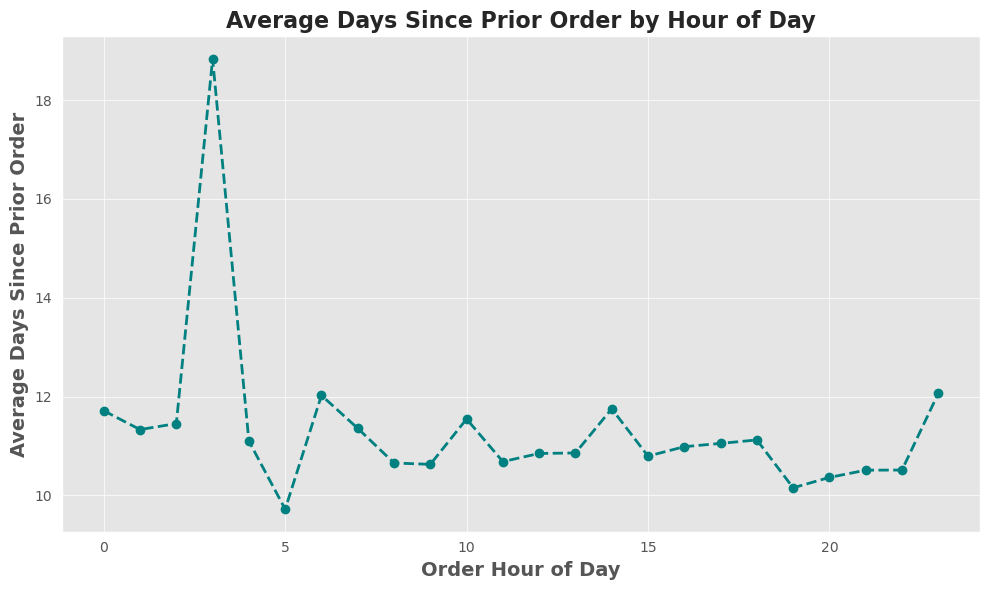

In [33]:
import matplotlib.pyplot as plt

# Sample subset and line chart
sample_df = df.sample(n=10000)
line_chart = sample_df.groupby('order_hour_of_day_x')['days_since_prior_order_x'].mean()

# Set plot size and style
plt.figure(figsize=(10, 6))
plt.style.use('ggplot')  # Alternative style

# Create the line chart with customization
line_chart.plot(color='teal', linewidth=2, linestyle='--', marker='o', markersize=6)

# Set labels and title with custom font and size
plt.xlabel('Order Hour of Day', fontsize=14, fontweight='bold')
plt.ylabel('Average Days Since Prior Order', fontsize=14, fontweight='bold')
plt.title('Average Days Since Prior Order by Hour of Day', fontsize=16, fontweight='bold')

# Add grid lines for better readability
plt.grid(True, which='both', linestyle='-', linewidth=0.5)

# Display the chart
plt.tight_layout()
plt.show()


# Task 06: Generate a Histogram for “order_hour_of_day”

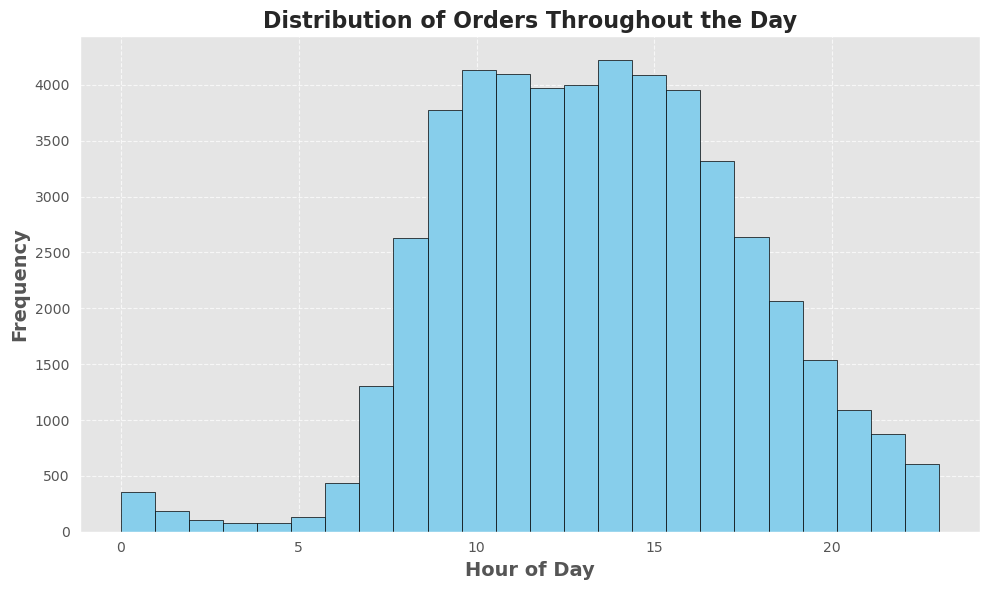

In [35]:
import matplotlib.pyplot as plt

# Histogram for "order_hour_of_day"
plt.figure(figsize=(10, 6))  # Set figure size

# Plot the histogram with custom styling
hist = df['order_hour_of_day_x'].plot(kind='hist', bins=24, color='skyblue', edgecolor='black')

# Set labels and title with customized font size and weight
plt.xlabel('Hour of Day', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Orders Throughout the Day', fontsize=16, fontweight='bold')

# Add gridlines to improve readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

# Task 07: Generate Bar Chart for "Loyalty Flag"

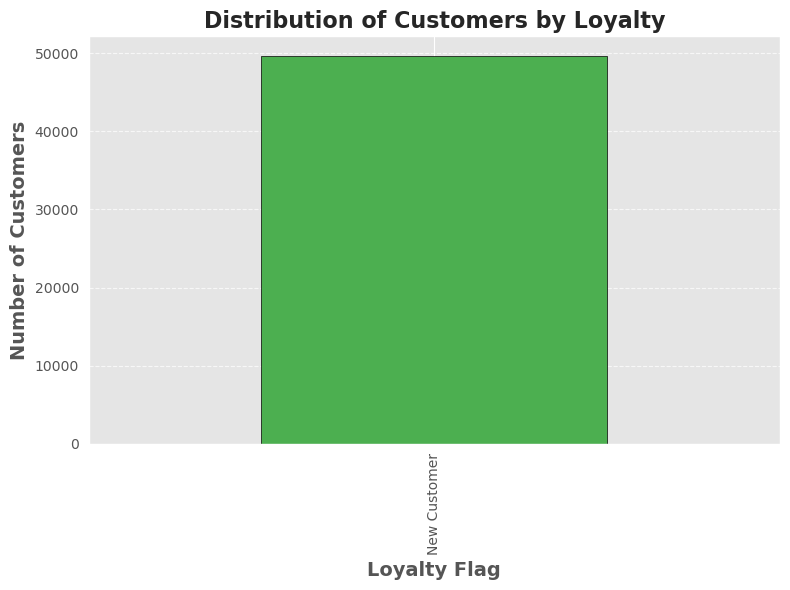

In [36]:
import matplotlib.pyplot as plt

# Bar Chart of Loyalty Flag
plt.figure(figsize=(8, 6))  # Set figure size for better readability

# Plot the bar chart with custom styling
bar = df['loyalty_flag'].value_counts().plot(kind='bar', color=['#4CAF50', '#FF6347'], edgecolor='black')

# Set labels and title with customized font size and weight
plt.xlabel('Loyalty Flag', fontsize=14, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=14, fontweight='bold')
plt.title('Distribution of Customers by Loyalty', fontsize=16, fontweight='bold')

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

# Task 08: Analyze Expenditure by Hour of the Day

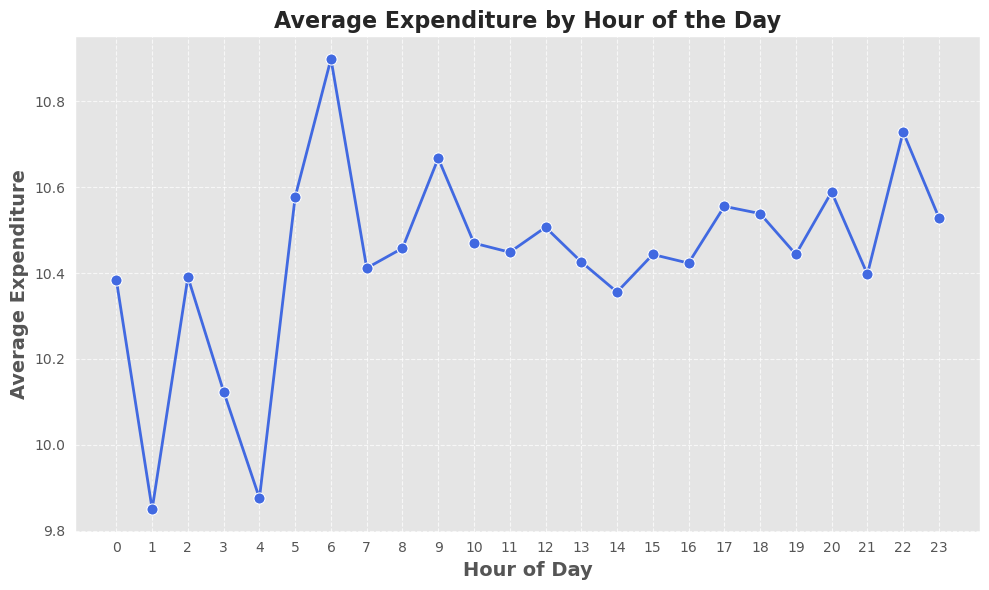

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure correct data types
df['order_hour_of_day_x'] = df['order_hour_of_day_x'].astype(int)
df['price'] = df['price'].astype(float)

# Aggregate average expenditure by hour
hourly_expenditure = df.groupby('order_hour_of_day_x')['price'].mean().reset_index()

# Line Chart of Expenditure Over Time
plt.figure(figsize=(10, 6))
line_age_nod = sns.lineplot(data=hourly_expenditure, x='order_hour_of_day_x', y='price', marker='o', 
                            color='royalblue', linewidth=2, markersize=8)

# Set labels and title with customized font size and weight
plt.xlabel('Hour of Day', fontsize=14, fontweight='bold')
plt.ylabel('Average Expenditure', fontsize=14, fontweight='bold')
plt.title('Average Expenditure by Hour of the Day', fontsize=16, fontweight='bold')

# Add grid lines and customize them for clarity
plt.grid(True, linestyle='--', alpha=0.7)

# Customize x-axis ticks to match the hour of the day
plt.xticks(range(0, 24))

# Display the plot with tight layout
plt.tight_layout()
plt.show()

In [41]:
import pandas as pd
import numpy as np

# Create a random dataset for demonstration
np.random.seed(42)  # For reproducibility
num_records = 1000  # Number of records in the dataset

# Generate random age data between 18 and 65
age_data = np.random.randint(18, 66, size=num_records)

# Generate random number of dependents (e.g., between 0 and 5)
n_dependants_data = np.random.randint(0, 6, size=num_records)

# Generate random income data (e.g., between 20,000 and 100,000)
income_data = np.random.randint(20000, 100001, size=num_records)

# Create a DataFrame with the random data
orders_df = pd.DataFrame({
    'Age': age_data,
    'n_dependants': n_dependants_data,
    'income': income_data
})


# Task 09: Create a Line Chart for Age vs. Number of Dependents

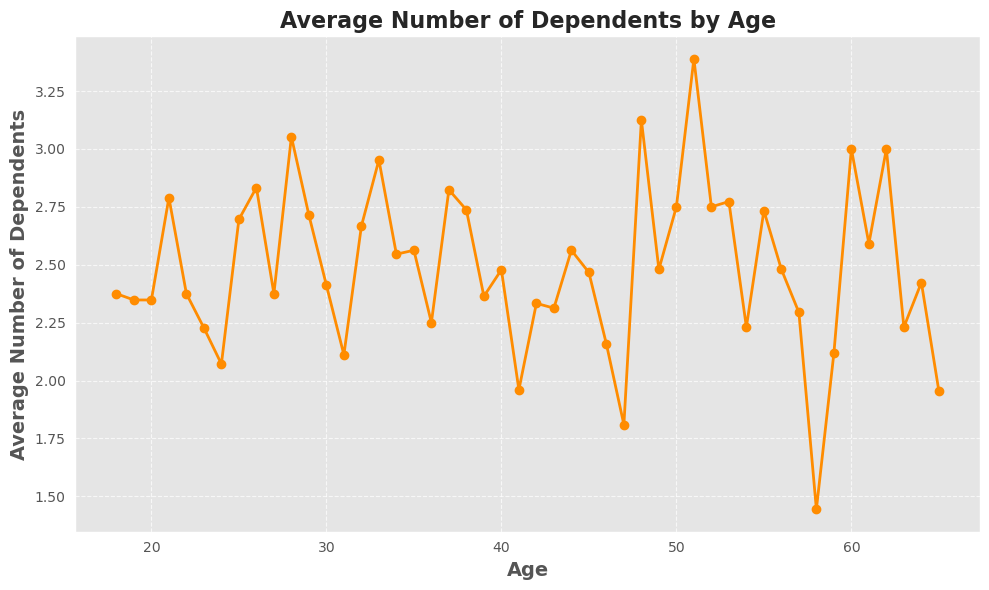

In [42]:
import matplotlib.pyplot as plt

# Line chart: Average number of dependents by age
age_dependents = orders_df.groupby('Age')['n_dependants'].mean()

# Set plot size and create the line chart
plt.figure(figsize=(10, 6))
age_dependents.plot(color='darkorange', linewidth=2, marker='o', markersize=6)

# Set labels and title with custom font styling
plt.xlabel('Age', fontsize=14, fontweight='bold')
plt.ylabel('Average Number of Dependents', fontsize=14, fontweight='bold')
plt.title('Average Number of Dependents by Age', fontsize=16, fontweight='bold')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot with tight layout for spacing
plt.tight_layout()
plt.show()

# Task 10: Create a Scatterplot for Age vs. Income

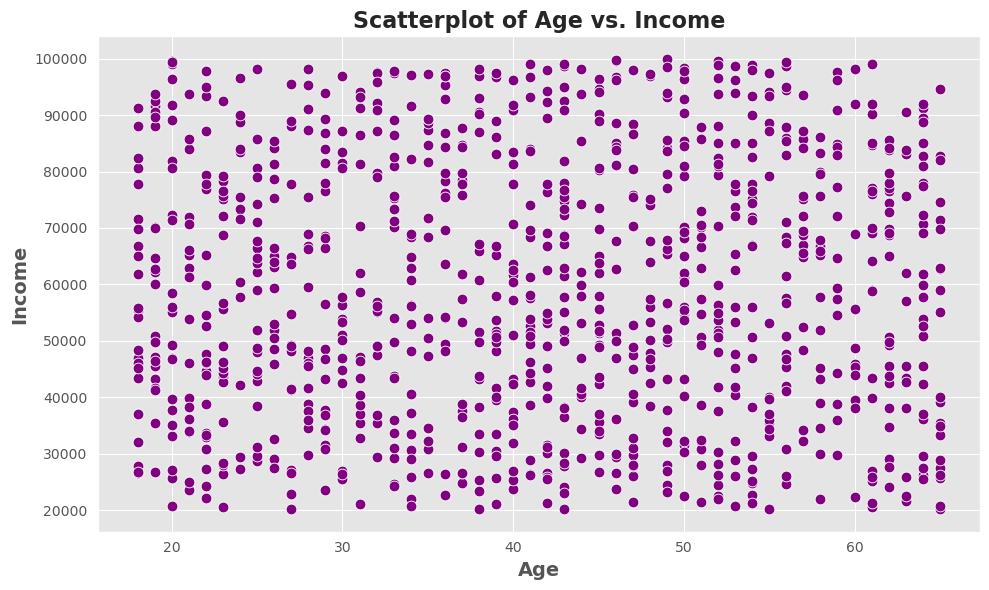

In [43]:
import seaborn as sns

# Scatterplot of Age and Income
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Age', y='income', data=orders_df, color='purple', s=60)

# Set labels and title with custom font styling
plt.xlabel('Age', fontsize=14, fontweight='bold')
plt.ylabel('Income', fontsize=14, fontweight='bold')
plt.title('Scatterplot of Age vs. Income', fontsize=16, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

In [44]:
import os

# Set the save path for the visualizations
save_path = os.path.join('C:\\', 'Users', 'Asus', 'OneDrive', 'Pictures', 'my python session projects', 'Export Visualizations as PNG Files', 'Analysis', 'Visualizations')

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Save each figure as a .png file
hist.figure.savefig(os.path.join(save_path, 'hist_order_hour_of_day.png'))
bar.figure.savefig(os.path.join(save_path, 'bar_loyalty_flag.png'))
line_age_nod.figure.savefig(os.path.join(save_path, 'line_age_number_of_dependents.png'))
scatter.figure.savefig(os.path.join(save_path, 'scatter_age_income.png'))

print("Visualizations saved successfully!")


Visualizations saved successfully!
